In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




#DATA CLEANSING

In [128]:
data = pd.read_excel('bread_basket1.xlsx')
print("DataFrame shape:",data.shape)
data.head()

DataFrame shape: (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Hair Clay & Hairwax Bundling,2022-10-30 09:58:00,morning,weekend
1,2,Ocean Dust Bundling & Ocean Dust & Refresh Wipes,2022-10-30 10:05:00,morning,weekend
2,2,Ocean Dust Bundling & Ocean Dust & Refresh Wipes,2022-10-30 10:05:00,morning,weekend
3,3,Dandruff Buster Shampoo,2022-10-30 10:07:00,morning,weekend
4,3,Ocean Dust & Dapper Statter,2022-10-30 10:07:00,morning,weekend


In [100]:
#format data waktu
data['date_time'] = pd.to_datetime(data['date_time'], format= "%d-%m-%Y %H:%M")

In [129]:
data["date_time"].dtype


dtype('<M8[ns]')

In [130]:
data["month"] = data['date_time'].dt.month
data["day"] = data['date_time'].dt.weekday
data["hour"] = data['date_time'].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Hair Clay & Hairwax Bundling,2022-10-30 09:58:00,morning,weekend,10,6,9
1,2,Ocean Dust Bundling & Ocean Dust & Refresh Wipes,2022-10-30 10:05:00,morning,weekend,10,6,10
2,2,Ocean Dust Bundling & Ocean Dust & Refresh Wipes,2022-10-30 10:05:00,morning,weekend,10,6,10
3,3,Dandruff Buster Shampoo,2022-10-30 10:07:00,morning,weekend,10,6,10
4,3,Ocean Dust & Dapper Statter,2022-10-30 10:07:00,morning,weekend,10,6,10


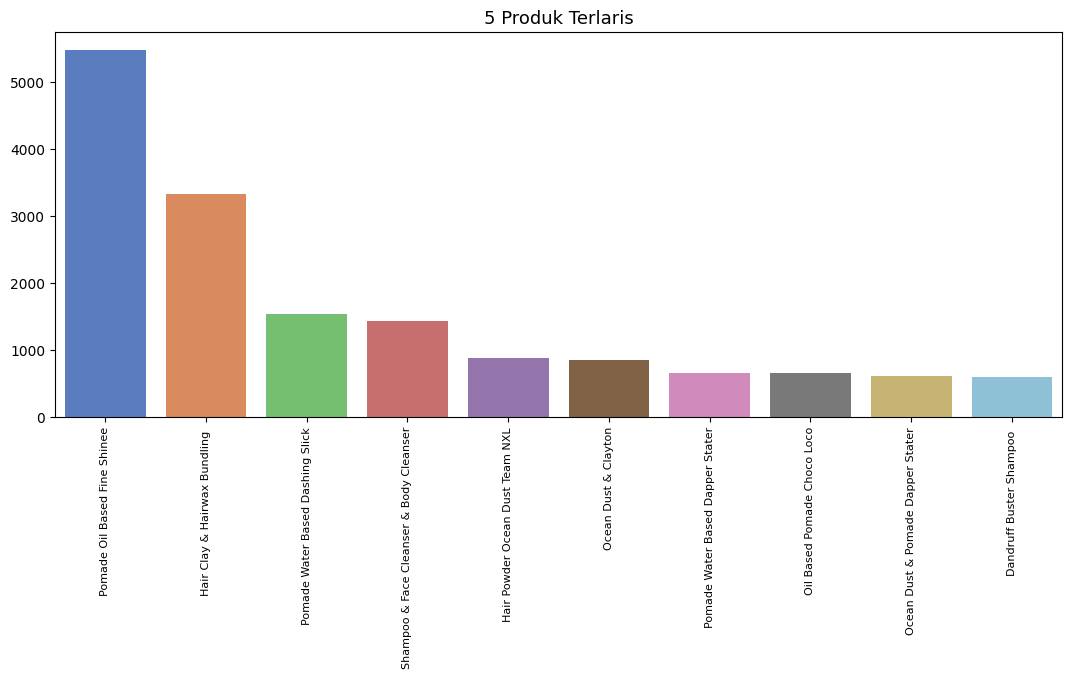

In [131]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index,
            y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 8, rotation = 90)
plt.title('5 Produk Terlaris', size = 13)
plt.show()

Text(0.5, 1.0, 'jumlah transaksi tiap bulan dari October hingga April')

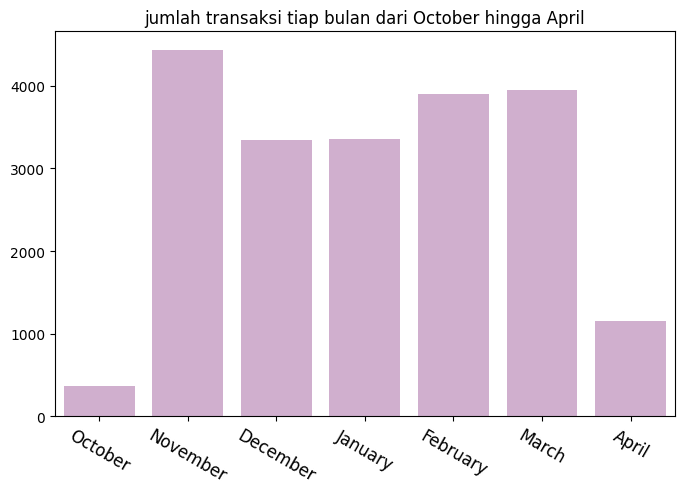

In [132]:
#transaksi perbulan

data_perbulan = data.groupby('month')['Transaction'].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["October", "November", "December", "January", "February", "March", "April"],
    y = data_perbulan.values, color="#D5AAD3")
plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi tiap bulan dari October hingga April")



Text(0.5, 1.0, 'jumlah transaksi setiap harinya')

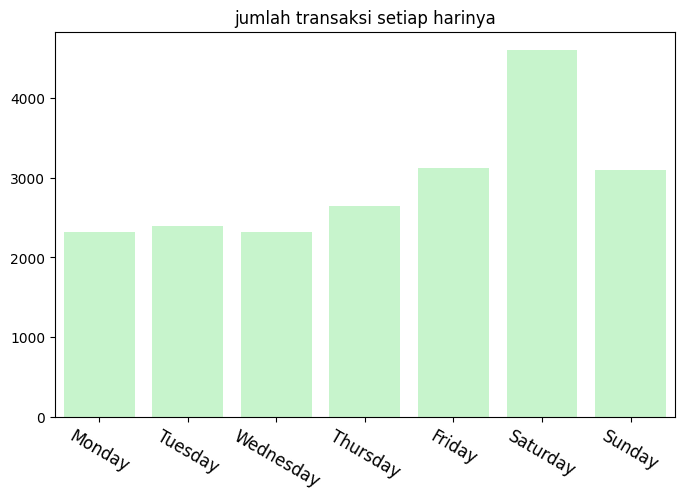

In [133]:
#transaksi perhari

data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    y = data_perday.values, color="#BFFCC6")
plt.xticks(size = 12, rotation = -30)
plt.title("jumlah transaksi setiap harinya")

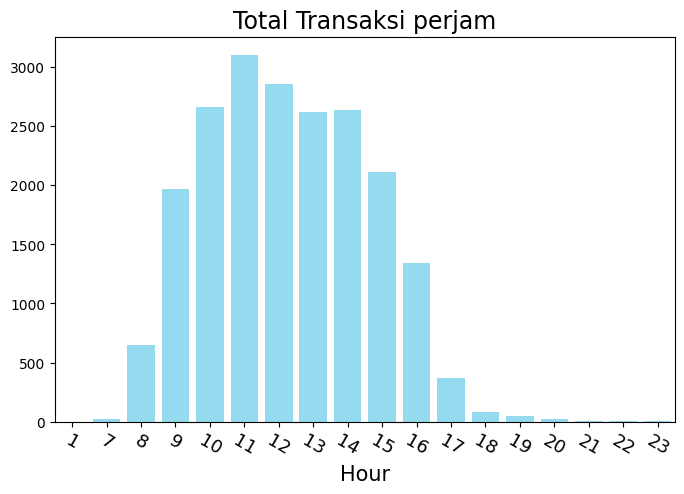

In [134]:
#transaksi perjam

data_perhour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize= (8,5))
sns.barplot(
    x = data_perhour.index,
    y = data_perhour.values, color="#85E3FF")
plt.xlabel('Hour', size = 15)
plt.xticks(size = 12, rotation = -30)
plt.title("Total Transaksi perjam", size = 17)
plt.xticks(size = 13)
plt.show()

#DATA PREPARATION

In [135]:
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [136]:
data["Item"] = data["Item"].apply(lambda item: item.strip())


In [137]:
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,hair clay & hairwax bundling
1,2,ocean dust bundling & ocean dust & refresh wipes
2,2,ocean dust bundling & ocean dust & refresh wipes
3,3,dandruff buster shampoo
4,3,ocean dust & dapper statter
5,3,ocean dust & hair clay
6,4,ocean dust & hair clay
7,5,pomade oil based fine shinee
8,5,ocean dust & clayton
9,5,hair clay & hairwax bundling


In [138]:
from mlxtend.frequent_patterns import association_rules, apriori

In [139]:
item_count = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,hair clay & hairwax bundling,1
1,2,ocean dust bundling & ocean dust & refresh wipes,2
2,3,dandruff buster shampoo,1
3,3,ocean dust & dapper statter,1
4,3,ocean dust & hair clay,1
5,4,ocean dust & hair clay,1
6,5,hair clay & hairwax bundling,1
7,5,ocean dust & clayton,1
8,5,pomade oil based fine shinee,1
9,6,ocean dust & clayton,1


In [113]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset :",item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset : (9463, 46)


Item,adjustment,bubblewrap tambahan,dandruff buster shampoo,deep face cleanser facial wash,gift voucher,gingerhair clay & hairwax bundling syrup,hack the stack,hair clay & hairwax bundling,hair clay & hairwax bundling pudding,hair powder ocean dust team nxl,...,pomade oil based fine shinee granules,pomade oil based premium medium,pomade water based dapper stater,pomade water based dapper stater shorthair clay & hairwax bundling hair powder ocean dust team nxl,pomade water based dashing slick,refresh wipes,shampoo & face cleanser & body cleanser,smith tshirt collection ss19,tote bag,tshirt
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,adjustment,bubblewrap tambahan,dandruff buster shampoo,deep face cleanser facial wash,gift voucher,gingerhair clay & hairwax bundling syrup,hack the stack,hair clay & hairwax bundling,hair clay & hairwax bundling pudding,hair powder ocean dust team nxl,...,pomade oil based fine shinee granules,pomade oil based premium medium,pomade water based dapper stater,pomade water based dapper stater shorthair clay & hairwax bundling hair powder ocean dust team nxl,pomade water based dashing slick,refresh wipes,shampoo & face cleanser & body cleanser,smith tshirt collection ss19,tote bag,tshirt
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
#  funnction 
def encode(x):
    if x <=0:
        return 0
    elif x >= 1:
        return 1
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

Item,adjustment,bubblewrap tambahan,dandruff buster shampoo,deep face cleanser facial wash,gift voucher,gingerhair clay & hairwax bundling syrup,hack the stack,hair clay & hairwax bundling,hair clay & hairwax bundling pudding,hair powder ocean dust team nxl,...,pomade oil based fine shinee granules,pomade oil based premium medium,pomade water based dapper stater,pomade water based dapper stater shorthair clay & hairwax bundling hair powder ocean dust team nxl,pomade water based dashing slick,refresh wipes,shampoo & face cleanser & body cleanser,smith tshirt collection ss19,tote bag,tshirt
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
print("Ukuran Dataset : ", item_count_pivot.shape)
print("Jumlah Transaksi : ", item_count_pivot.shape[0])
print("Jumlah Item : ", item_count_pivot.shape[1])


Ukuran Dataset :  (9463, 46)
Jumlah Transaksi :  9463
Jumlah Item :  46


In [152]:
#Aturan asosiasi
support = 0.01
frequent_items = apriori(item_count_pivot, min_support=  support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
17,0.478495,(pomade oil based fine shinee)
3,0.327169,(hair clay & hairwax bundling)
20,0.154285,(pomade water based dashing slick)
21,0.142661,(shampoo & face cleanser & body cleanser)
34,0.090035,"(hair clay & hairwax bundling, pomade oil base..."
7,0.086125,(ocean dust & clayton)
4,0.081264,(hair powder ocean dust team nxl)
14,0.068266,(oil based pomade choco loco)
19,0.068160,(pomade water based dapper stater)
53,0.065941,"(pomade oil based fine shinee, pomade water ba..."


In [153]:
#pola asosiasi pembelian barang PT SMith INdonesia Jaya
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents","consequents","support","confidence","lift"]]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
0,(bubblewrap tambahan),(pomade oil based fine shinee),0.019127,0.572785,1.197054
19,(ocean dust & pomade dapper stater),(pomade oil based fine shinee),0.035190,0.569231,1.189627
13,(ocean dust & clayton),(pomade oil based fine shinee),0.047554,0.552147,1.153924
31,(smith tshirt collection ss19),(pomade oil based fine shinee),0.019656,0.540698,1.129996
9,(hair powder ocean dust team nxl),(pomade oil based fine shinee),0.043538,0.535761,1.119678
25,(parfume sonar x smith date u),(pomade oil based fine shinee),0.027475,0.532787,1.113463
26,(pomade oil based bold),(pomade oil based fine shinee),0.020818,0.519789,1.086299
15,(ocean dust & hair clay),(pomade oil based fine shinee),0.028215,0.517442,1.081394
2,(dandruff buster shampoo),(pomade oil based fine shinee),0.029589,0.507246,1.060087
28,(pomade water based dapper stater),(pomade oil based fine shinee),0.033922,0.497674,1.040082
